In [53]:
import os
import deepchem as dc
import pandas as pd

# Compute Tanimoto similarity matrix
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

from utils import get_similarity

# Studying Ways of visualization and featurization of SMILES strings

In [54]:
# Load BACE regression dataset
bace_tasks, bace_datasets, transformers = dc.molnet.load_bace_regression(featurizer='ECFP')

In [72]:
# Create a DataFrame 
smiles = bace_datasets[0].ids.tolist()
targets = bace_datasets[0].y
fingerprints = bace_datasets[0].X

## A simple Model:

In [56]:
similarity_matrix, fingerprints, mols = get_similarity(smiles)
df = pd.DataFrame(similarity_matrix, index=smiles, columns=smiles)


In [58]:
# List the 10 closest pairs, their similarity and their targets, save them to a df
closest_pairs = []
for i in range(len(smiles)):
    for j in range(i+1, len(smiles)):
        closest_pairs.append((smiles[i], smiles[j], similarity_matrix[i, j], targets[i], targets[j]))
        
closest_pairs = sorted(closest_pairs, key=lambda x: x[2], reverse=True)
# closest_pairs = closest_pairs[:50]
closest_pairs = pd.DataFrame(closest_pairs, columns=['SMILES 1', 'SMILES 2', 'Similarity', 'Target 1', 'Target 2'])
# List of Similarity values
closest_pairs.to_csv('./data/closest_pairs.csv', index=False)
# # Save the Similarity DataFrame
df.to_csv('./data/similarity_matrix.csv')

In [76]:
smile = 'CC1=CC(=O)C2=C(C1=O)C=CC=C2'
mol = Chem.MolFromSmiles(smiles)

# Canonicalize the molecule
mol2 = Chem.Mol(mol.ToBinary())
mol2 = Chem.RemoveHs(mol)
mol2 = Chem.MolFromSmiles(Chem.MolToSmiles(mol))
print(Chem.MolToSmiles(mol))


CC1=CC(=O)c2ccccc2C1=O


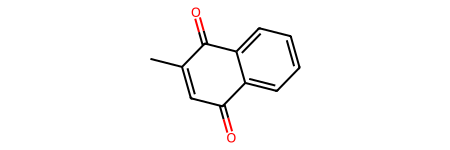

In [80]:
mol2